In [14]:
import torch
import torch.nn as nn
import torch.optim
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns

from model import CNN
%matplotlib inline

In [2]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
batch_size = 256
learning_rate = 0.0002
num_epoch = 10

In [4]:
download_path = './Dataset'

train_dataset = dset.MNIST(download_path, transform=transforms.ToTensor(), train = True, download = True)
test_dataset = dset.MNIST(download_path, transform=transforms.ToTensor(), train = False, download = True)

E:\Miniconda3\envs\frost\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [7]:
# train
steps = []
loss_arr = []
step = 0
for i in range(num_epoch):
    for j, [image, label] in enumerate(train_loader):
        x = image.to(device)
        y_ = label.to(device)

        optimizer.zero_grad()
        output = model.forward(x)
        loss = loss_func(output, y_)
        loss.backward()
        optimizer.step()

        if j % 100 == 0:
            step = step + 100
            steps.append[step]
            cpu_loss = loss.cpu().detach().numpy()
            print(f" step : {step}, current loss : {cpu_loss}")
            loss_arr.append(cpu_loss)

E:\Miniconda3\envs\frost\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


 step : 100, current loss : 2.3069117069244385
 step : 200, current loss : 0.5187492370605469
 step : 300, current loss : 0.28136032819747925
 step : 400, current loss : 0.3051002323627472
 step : 500, current loss : 0.23814672231674194
 step : 600, current loss : 0.23325027525424957
 step : 700, current loss : 0.12707605957984924
 step : 800, current loss : 0.09907405078411102
 step : 900, current loss : 0.10305913537740707
 step : 1000, current loss : 0.0783165693283081
 step : 1100, current loss : 0.09124874323606491
 step : 1200, current loss : 0.10097873955965042
 step : 1300, current loss : 0.095696821808815
 step : 1400, current loss : 0.10397475957870483
 step : 1500, current loss : 0.054485566914081573
 step : 1600, current loss : 0.05417254567146301
 step : 1700, current loss : 0.031768180429935455
 step : 1800, current loss : 0.05528963357210159
 step : 1900, current loss : 0.12169183790683746
 step : 2000, current loss : 0.035626716911792755
 step : 2100, current loss : 0.0

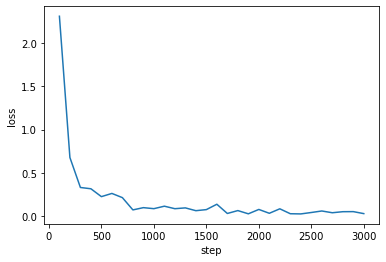

In [14]:
plt.plot(steps, loss_arr)
plt.xlabel("step")
plt.ylabel("loss")
plt.show()

In [15]:
# test
correct = 0
total = 0

with torch.no_grad():
    for image, label in test_loader:
        x = image.to(device)
        y_ = label.to(device)

        output = model.forward(x)
        _,output_index = torch.max(output,1)
        total += label.size(0)
        correct += (output_index == y_).sum().float()

    print("Accuracy : {}", format(100*correct/total))

Accuracy : {} 98.64783477783203


In [11]:
path = './Model'
torch.save(model.state_dict(), path)